## Step 1: Create a tiny dataset
a 2D dataset of 8 points

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array(
    [
        [1, 2],
        [1.5, 1.8],
        [5, 8],
        [8, 8],
        [1, 0.6],
        [9, 11],
        [8, 2],
        [10, 2]
    ]
)

print(X.shape, "8 rows, 2 columns")

(8, 2) 8 rows, 2 columns


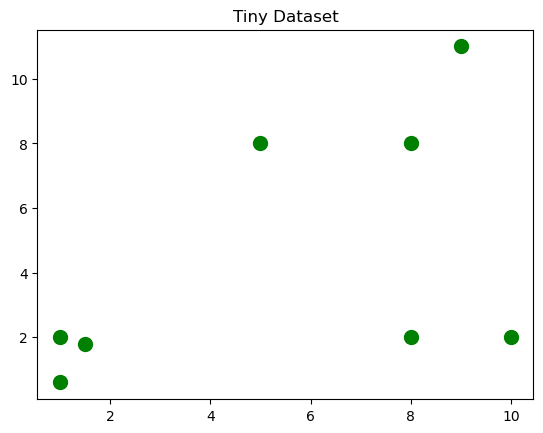

In [3]:
plt.scatter(X[:, 0], X[:, 1],s =100, c='green')  # plt.scatter( x-axis me array X ke all rows first column values- 0th indices wale points, y-axis me array X ke all rows second column value .i.e 1st index wale points, 's' refers to size of each point, 'c' refers to color)
plt.title("Tiny Dataset")
plt.show()

## Step 2: Initialize cluster centroids
Let's choose k = 2 \
we'll randomly pick 2 points from the dataset to start as centroids

In [4]:
# choose k 
k = 2

# randomly pick 2 points as initial centroids
np.random.seed(42)  # for reproducibility
centroids = X[np.random.choice(X.shape[0], k, replace= False)]

"""
here, 
    X.shape[0] : returns no. of rows in X (=8) == the total number of datapoints
    k = 2, select two unique indices 
    replace = False : ensures no duplicates - each centroid is different data point

    so np.random.choice picks two values between [0-7], as indices 
    and X[index1, index2] will return an array of those 2 data point as shown in the 
    below code box
"""

print("Initial Centroids: ")
print(centroids)

Initial Centroids: 
[[ 1.5  1.8]
 [ 9.  11. ]]


In [5]:
# this is for understanding how the above centroids = X[] line is processed
np.random.seed(42)
a = np.random.choice(8, 2, replace=False)
print("Indices = ", a)

cen_samp = X[a]
print("Data points: ")
print(cen_samp)

Indices =  [1 5]
Data points: 
[[ 1.5  1.8]
 [ 9.  11. ]]


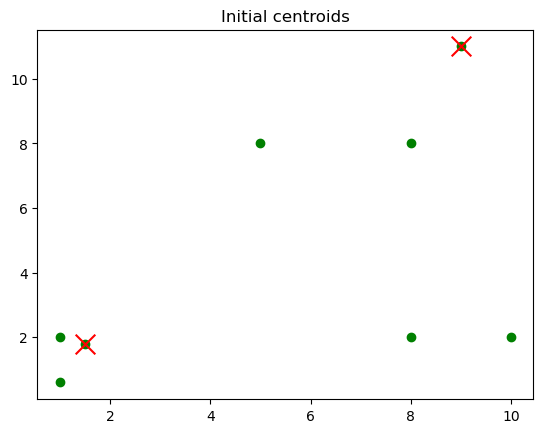

In [44]:
# let's visualize the centroids
plt.scatter(X[:, 0], X[:, 1], c='green')
plt.scatter(centroids[:, 0], centroids[:,1], marker='x', s=200, c='red')
plt.title("Initial centroids")
plt.show()

In [41]:
print(X[:], end='\n\n')
print(X[:, 0], end='\n\n')
print(X[:, 1], end='\n\n')

[[ 1.   2. ]
 [ 1.5  1.8]
 [ 5.   8. ]
 [ 8.   8. ]
 [ 1.   0.6]
 [ 9.  11. ]
 [ 8.   2. ]
 [10.   2. ]]

[ 1.   1.5  5.   8.   1.   9.   8.  10. ]

[ 2.   1.8  8.   8.   0.6 11.   2.   2. ]



In [42]:
print(centroids[:], end='\n\n')
print(centroids[:, 0], end='\n\n')
print(centroids[:, 1], end='\n\n')

[[ 1.5  1.8]
 [ 9.  11. ]]

[1.5 9. ]

[ 1.8 11. ]



## Step 4: Calculating distances of points from centroids
check for each point is it closer to C1 or C2

In [45]:
from scipy.spatial.distance import cdist

In [46]:
distances = cdist(X, centroids)  # compute euclidean distance to both centroids
print(distances)

[[ 0.53851648 12.04159458]
 [ 0.         11.86970935]
 [ 7.119691    5.        ]
 [ 8.98276127  3.16227766]
 [ 1.3        13.12097557]
 [11.86970935  0.        ]
 [ 6.5030762   9.05538514]
 [ 8.50235262  9.05538514]]


In [54]:
import pandas as pd

indices_datapoints = [chr(i) for i in range(ord('A'), ord('H')+1)]

dist_df = pd.DataFrame(distances, columns=["d from C1", "d from C2"], index=indices_datapoints)

dist_df.head(8)

,d from C1,d from C2
A,0.538516,12.041595
B,0.000000,11.869709
C,7.119691,5.000000
D,8.982761,3.162278
E,1.300000,13.120976
F,11.869709,0.000000
G,6.503076,9.055385
H,8.502353,9.055385


## Step 5: Assigning Cluster to datapoints
datapoints will be assigned to the cluster with nearer centroid

In [58]:
labels = np.argmin(distances, axis=1)
# this line assigns each data point to nearest cetnroid based on the distnce matrix
# 0 for the first cluster
# 1 for the second cluster

# np.argmin(...) : for each row it finds the index of the smallest value -- the closest centroid
# axis = 1, means it operates across columns i.e (operates per row, i.e per datapoint)

# thus labels = 1D array where each element is the index of the nearest centroid for this datapoint

print(labels)

[0 0 1 1 0 1 0 0]


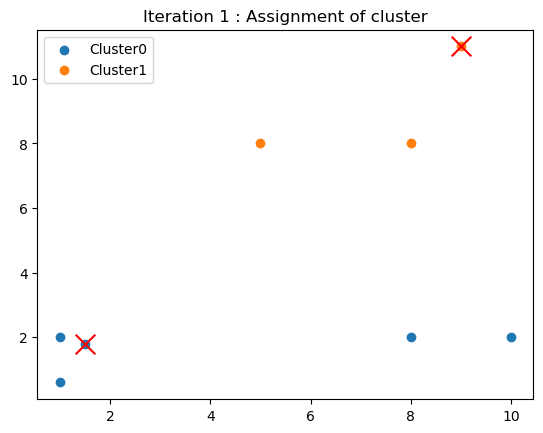

In [62]:
# visualize
for i in range(2):
    plt.scatter(X[labels == i, 0], X[labels==i, 1], label = f"Cluster{i}")
    # labels == i, creates a boolean mask that selects all rows in X assigned to cluster i
    # X[labels == i, 0] selects the x coordinates of points in cluster i
    # for more info : link : https://www.reddit.com/user/Shiv_shar/comments/1mxymwp/for_i_in_range2_pltscatterxlabelsi_0_xlabelsi_1/?utm_source=share&utm_medium=web3x&utm_name=web3xcss&utm_term=1&utm_content=share_button

plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red')
plt.legend()
plt.title("Iteration 1 : Assignment of cluster")
plt.show()

## Step 6: Update centroids
now take the mean of the points in each cluster to get new centroids

In [72]:
new_centroids = []

for i in range(2):
    print(f"Cluster - {i}")
    arr = X[labels == i]
    print(arr)

    clust_mean = arr.mean(axis = 0)
    print(f"Mean = {clust_mean}")
    
    new_centroids.append(clust_mean)
    print()

new_centroids = np.array(new_centroids)
print(new_centroids)


# or just new_centroids = np.array( [ X[labels == i].mean(axis = 0) for i in range(2) ] )

Cluster - 0
[[ 1.   2. ]
 [ 1.5  1.8]
 [ 1.   0.6]
 [ 8.   2. ]
 [10.   2. ]]
Mean = [4.3  1.68]

Cluster - 1
[[ 5.  8.]
 [ 8.  8.]
 [ 9. 11.]]
Mean = [7.33333333 9.        ]

[[4.3        1.68      ]
 [7.33333333 9.        ]]


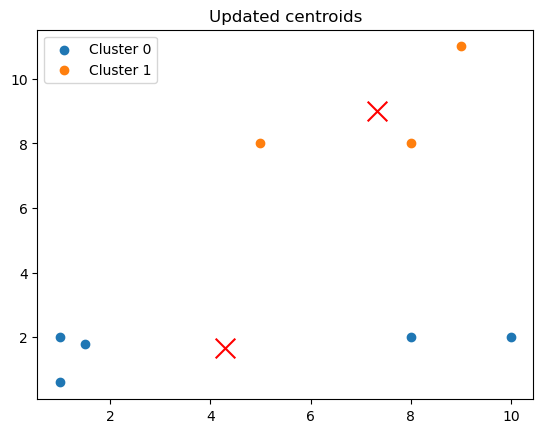

In [73]:
# visualize 

for i in range(2):
    plt.scatter( X[labels == i, 0], X[labels == i, 1], label = f"Cluster {i}")

# plot new centroids as cross
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], marker='x', s=200, c='red')
plt.legend()
plt.title("Updated centroids")
plt.show()

## that's one full iteration of K means done manually
1. pick k
2. select centroids randomly
3. calculate Euclidean dist of datapoints from centroids
4. Assign cluster (nearest centroid)
5. Update centroids
6. Repeat till it reaches convergence